[[ 0  0  0  0  0]
 [ 3  3  1  3  3]
 [-1 -8 -1 -1 -2]
 [ 3  3  1  3  2]]


,index,0,1
0,0,-0.000043,-0.000016
1,1,-0.000245,-0.000025
2,2,-0.000174,-0.000143
3,3,-0.000050,0.000122


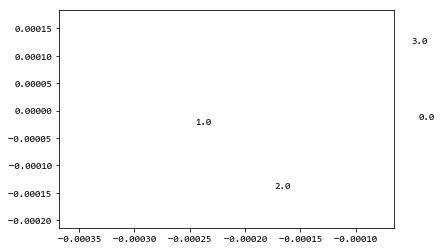

In [86]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
print(X)
model = TSNE(n_components=2, learning_rate=100)
np.set_printoptions(suppress=True)
X = np.array([[0, 0, 0, 0, 0], [3, 3, 1, 3, 3], [-1, -8, -1, -1, -2], [3, 3, 1, 3, 2]])
df = pd.DataFrame(X)
df_result = pd.DataFrame(model.fit_transform(X))
plt.gca().set_xlim(df_result.iloc[:,0].min()*1.5, df_result.iloc[:,0].max()*1.5)
plt.gca().set_ylim(df_result.iloc[:,1].min()*1.5, df_result.iloc[:,1].max()*1.5)
df_result = df_result.reset_index()
display(df_result)
for idx, row in df_result.iterrows():
    plt.text(row[0], row[1], row['index'])

In [24]:
df.sort_values(by='result')

,0,1,2,3,4,result
1,0,1,1,1,1,-0.000173
2,-1,-8,-1,-1,-2,-0.000098
3,3,3,1,3,2,0.000067
0,0,0,0,0,0,0.000148


,0,1,2,3
31,5.4,3.4,1.5,0.4
42,4.4,3.2,1.3,0.2
48,5.3,3.7,1.5,0.2


,0
5,0
41,0
63,1


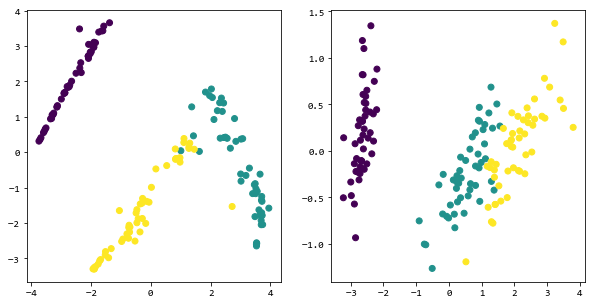

In [53]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib.pyplot import *
from IPython.display import display

iris = load_iris()
df_data = pd.DataFrame(iris.data)
display(df_data.sample(3))
df_result = pd.DataFrame(iris.target)
display(df_result.sample(3))

X_tsne = TSNE(n_components=2, learning_rate=10).fit_transform(iris.data)
X_pca = PCA(n_components=2).fit_transform(iris.data)


figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

index,国防军工,公路铁路运输,钢铁,非汽车交运,基础化学,证券,化工合成材料,公交,交运设备服务,汽车整车,...,保险及其他,食品加工制造,计算机应用,港口航运,园区开发,养殖业,传媒,半导体及元件,新材料,石油矿业开采
pos_x,-4.567223,-3.839520,3.892543,-1.518615,-3.706385,-3.500391,-2.323428,1.432492,-0.631546,-2.999683,...,-3.319594,-0.137957,2.867417,1.658178,2.193305,4.413260,2.191267,1.406823,4.020841,0.512863
pos_y,-1.573018,-1.265859,2.369690,-0.711402,-0.191081,-1.862535,-0.121492,-0.952372,-0.547104,-0.499824,...,-1.815119,-0.963748,-0.685184,1.040798,-0.471697,0.453031,-0.025028,-0.370634,1.822889,2.418664


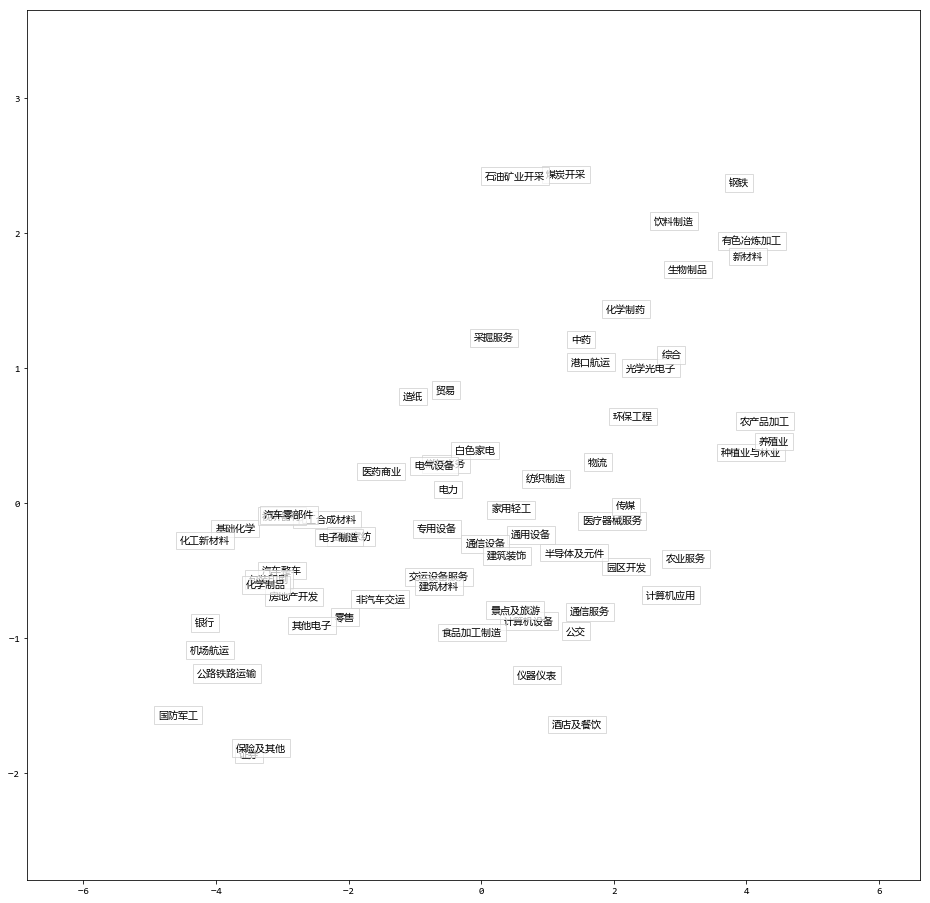

In [118]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display


import base
import fund_scanner.common_tools.database as db
engine = db.get_sqlalchemy_engine(dbname='stock_index')

df = pd.read_sql('select * from stock_indexes where `发布日期` between "2017-08-05" and Now();', engine)
df_to_plot = pd.DataFrame([])
for code in df['index_code'].unique():
    df_one_kind = df.loc[df['index_code']==code, ['序号','行业','行业指数','涨跌幅','发布日期','index_code']]
    df_one_kind = df_one_kind.reset_index().set_index('发布日期')
    
    industry_name = df_one_kind['行业'].iloc[0]
    first_number = df_one_kind['行业指数'].iloc[0]
    df_to_plot[industry_name] = df_one_kind['行业指数'] / first_number * 100


df_to_tsne = df_to_plot.T

#display(df_to_tsne)
model = TSNE(n_components=2, learning_rate=10)
df_result = pd.DataFrame(model.fit_transform(df_to_tsne))
df_result.columns = ['pos_x', 'pos_y']
df_to_tsne = df_to_tsne.reset_index()
df_result = pd.concat([df_to_tsne, df_result], axis=1)
#display(df_result)

df_ret = df_result.set_index('index').loc[:,['pos_x', 'pos_y']].T
display(df_ret)

plt.figure(figsize=[16, 16])
for idx, row in df_result.iterrows():
    plt.text(row['pos_x'], row['pos_y'], row['index'], 
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', edgecolor=(0.8,0.8,0.8,1), alpha=0.7))
plt.gca().set_xlim(df_result.loc[:,'pos_x'].min()*1.5, df_result.loc[:,'pos_x'].max()*1.5)
plt.gca().set_ylim(df_result.loc[:,'pos_y'].min()*1.5, df_result.loc[:,'pos_y'].max()*1.5)
plt.show()